<a href="https://colab.research.google.com/github/Anushadhirde/FMML_lab/blob/main/FMML_M9_project(b)_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 9 Project (b): Convolutional Neural Networks Project

## Module coordinator: Kushagra Agarwal



<img src="https://hub.packtpub.com/wp-content/uploads/2018/04/iStock-851960058-696x464.jpg" width=850px/>

In this project, you will understand how you can perform emotion recognition using CNNs in a step-by-step manner. To make your task easier, we provide you the starter code for the project. It is expected that you should try to understand the project statement properly and perform the tasks in sequence. We will be using Pytorch framework for the implementation. You need to fill in the missing code parts to achieve a particular task. At the end, you will have a basic implementation ready for an emotion detection application.

Basic steps involved in Emotion Recognition:
- Face detection
- Building classifier
- Classifying emotions

We will use a popular FER2013 dataset for this project.

## Task 1: Explore the dataset
The dataset contains 48 x 48 grayscale facial images of faces.The faces have been automatically registered so that the face is more or less centred and occupies about the same amount of space in each image. The task is to categorize each face based on the emotion shown in the facial expression into one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral).

<img src="https://www.researchgate.net/profile/Chaudhary-Aqdus/publication/349055345/figure/fig3/AS:987834383085568@1612529478973/FER-2013-sample-images-for-facial-emotion-recognition.jpg" width=650px/>

Import libraries

In [1]:
# We have imported the necessary packages here. Feel free to import anything more you need!
import torch
import torchvision
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dlib
import cv2
from PIL import Image

### Download and load dataset

In [2]:
!gdown https://drive.google.com/uc?id=1YrNrok2Z1udWWIpejXIdLk7duUq87s0N
!unzip fer2013.csv.zip

Downloading...
From (original): https://drive.google.com/uc?id=1YrNrok2Z1udWWIpejXIdLk7duUq87s0N
From (redirected): https://drive.google.com/uc?id=1YrNrok2Z1udWWIpejXIdLk7duUq87s0N&confirm=t&uuid=e3e4cff1-94b9-4344-9198-d7d77d570b62
To: /content/fer2013.csv.zip
100% 101M/101M [00:01<00:00, 71.5MB/s] 
Archive:  fer2013.csv.zip
  inflating: fer2013.csv             


In [3]:
# Load the dataset csv using pandas package. It displays the data in tabular form
emotion_data = pd.read_csv('./fer2013.csv')
print(emotion_data)

       emotion                                             pixels        Usage
0            0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...     Training
1            0  151 150 147 155 148 133 111 140 170 174 182 15...     Training
2            2  231 212 156 164 174 138 161 173 182 200 106 38...     Training
3            4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...     Training
4            6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...     Training
...        ...                                                ...          ...
35882        6  50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...  PrivateTest
35883        3  178 174 172 173 181 188 191 194 196 199 200 20...  PrivateTest
35884        0  17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...  PrivateTest
35885        3  30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...  PrivateTest
35886        2  19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...  PrivateTest

[35887 rows x 3 columns]


In [4]:
# Class dictionary for dataset
classes = {0:"Angry", 1:"Disgust", 2:"Fear", 3:"Happy", 4:"Sad", 5:"Surprise", 6:"Neutral"}

### Visualize a few images from dataset

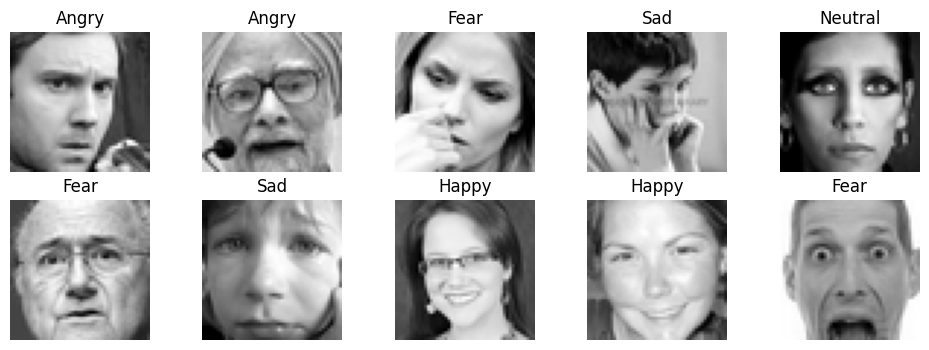

In [5]:
fig = plt.figure(figsize=(12,4))
for i in range(10):
  ax = plt.subplot(2,5,i+1)
  # This is how we access ith row in 'pixels' column in the dataset table
  img = emotion_data.iloc[i]['pixels'].split(' ') # Converting into array of ints
  img = np.array(img).astype(int)

  # Labels for our dataset
  label = int(emotion_data.iloc[i]['emotion'])
  ax.imshow(img.reshape((48,48)), cmap='gray')
  ax.set_title(classes[label])
  ax.set_axis_off()
plt.show()

In [6]:
names, counts = np.unique(emotion_data['Usage'].to_numpy(), return_counts=True)
print('Number of samples in {} = {}'.format(names[0], counts[0])) #testset
print('Number of samples in {} = {}'.format(names[1], counts[1])) #valset
print('Number of samples in {} = {}'.format(names[2], counts[2])) #trainset

Number of samples in PrivateTest = 3589
Number of samples in PublicTest = 3589
Number of samples in Training = 28709


### Distribution of class labels

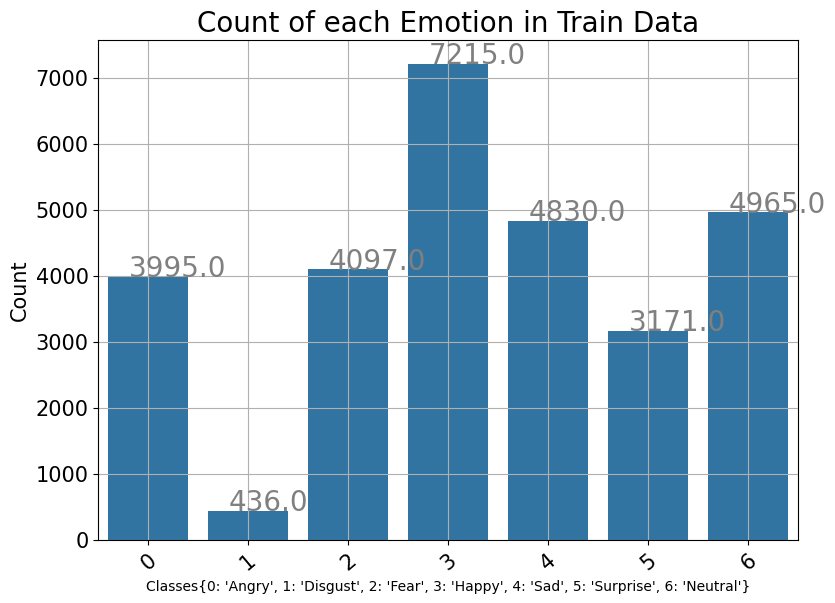

In [7]:
# Plot bar chart showing number of samples per class in the train set
temp_train = emotion_data.loc[emotion_data['Usage'] == 'Training']
df_temp_train = temp_train.sort_values(by = "emotion", inplace = False)
fig = plt.figure(figsize = (7, 5))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Count of each Emotion in Train Data", fontsize = 20)
sns.countplot(x = "emotion", data = df_temp_train)
plt.grid()
for i in ax.patches:
    ax.text(x = i.get_x() + 0.2, y = i.get_height()+1.5, s = str(i.get_height()), fontsize = 20, color = "grey")
plt.xlabel("Classes"+ str(classes))
plt.ylabel("Count", fontsize = 15)
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 40)
plt.show()

### Task: Similarly, write the code below to plot the charts for remaining two sets also.


<ipython-input-17-15a2e317086c>:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


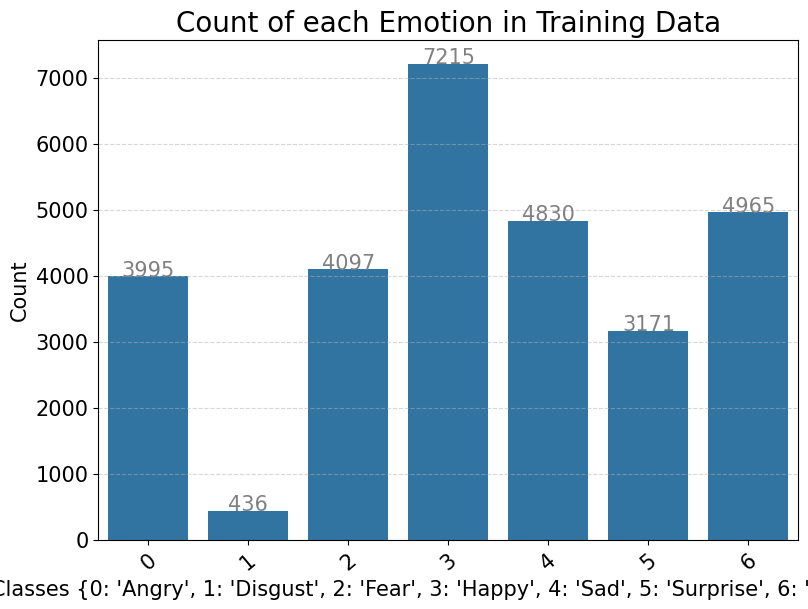

<ipython-input-17-15a2e317086c>:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


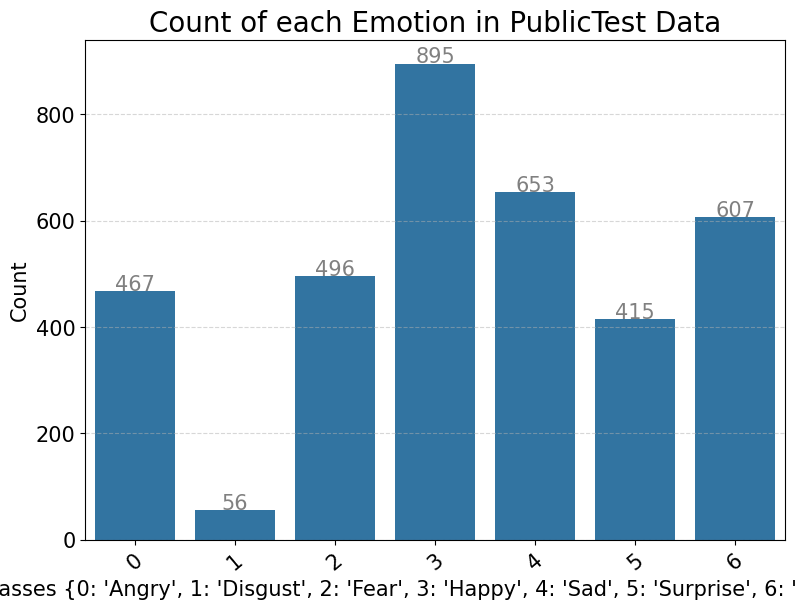

<ipython-input-17-15a2e317086c>:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


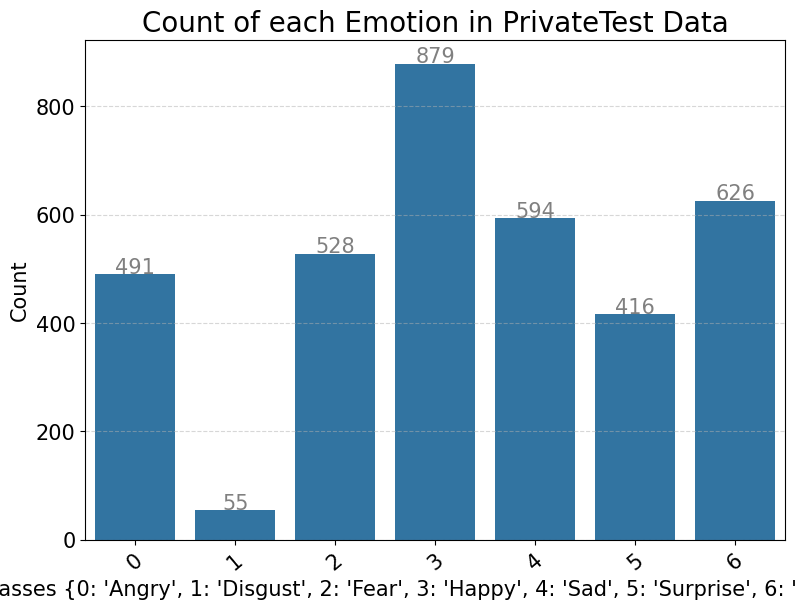

In [17]:
#TASK

# Helper function to plot counts for a given subset
def plot_usage_counts(df, usage_label, classes):
    subset = df.loc[df['Usage'] == usage_label]
    subset_sorted = subset.sort_values(by="emotion", inplace=False)

    fig = plt.figure(figsize=(7, 5))
    ax = fig.add_axes([0, 0, 1, 1])
    ax.set_title(f"Count of each Emotion in {usage_label} Data", fontsize=20)

    sns.countplot(x="emotion", data=subset_sorted, ax=ax)
    plt.grid(axis='y', linestyle='--', alpha=0.5)

    # annotate bars
    for p in ax.patches:
        ax.text(
            x=p.get_x() + p.get_width() / 2,
            y=p.get_height() + 1.5,
            s=int(p.get_height()),
            ha='center',
            fontsize=15,
            color='grey'
        )

    ax.set_xlabel(f"Classes {classes}", fontsize=15)
    ax.set_ylabel("Count", fontsize=15)
    ax.tick_params(labelsize=15)
    plt.xticks(rotation=40)
    plt.tight_layout()
    plt.show()

# Assuming `classes` is defined as your list of emotion labels
plot_usage_counts(emotion_data, 'Training', classes)
plot_usage_counts(emotion_data, 'PublicTest', classes)   # Validation set
plot_usage_counts(emotion_data, 'PrivateTest', classes)  # Test set


Note the imbalance in the data through above graphs.

Face detection: Many applications involving facial images as input data require face detection in the pipeline at this step. Here, we localise the face in the given image removing the irrelevant parts, making the face centered and occupying most of the part in the image. As mentioned earlier, our dataset already has more or less centered faces, so we will skip this step for now but when using some other dataset or using your own images (eg. from webcam) as you will do later, you can do this step to get a proper cropped face from the image.

## Task 2: Data preprocessing

### Creating train, validation and test sets

In [87]:
X_train, y_train = [], []
X_val, y_val     = [], []
X_test, y_test   = [], []

for _, row in emotion_data.iterrows():
    # Access the pixels data directly as a NumPy array
    pixels = row['pixels']

    # Reshape the pixels into a 48x48 array
    pixels = pixels.reshape(48, 48)

    if row['Usage'] == 'Training':
        X_train.append(pixels)
        y_train.append(row['emotion'])
    elif row['Usage'] == 'PublicTest':  # validation split
        X_val.append(pixels)
        y_val.append(row['emotion'])
    elif row['Usage'] == 'PrivateTest':  # test split
        X_test.append(pixels)
        y_test.append(row['emotion'])
    else:
        # if there are any unexpected Usage labels, you can skip or raise
        continue

# convert lists to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)
X_val,   y_val   = np.array(X_val),   np.array(y_val)
X_test,  y_test  = np.array(X_test),  np.array(y_test)

print('Training set shape:   ', X_train.shape, y_train.shape)
print('Validation set shape: ', X_val.shape,   y_val.shape)
print('Testing set shape:    ', X_test.shape,  y_test.shape)

Training set shape:    (28709, 48, 48) (28709,)
Validation set shape:  (3589, 48, 48) (3589,)
Testing set shape:     (3589, 48, 48) (3589,)


In [9]:
# To get data between 0 and 1
X_train = X_train.astype(float) / 255.
X_test = X_test.astype(float) / 255.
X_val = X_val.astype(float) / 255.

We will define a dataset wrapper over Pytorch Dataset class which takes in the numpy arrays we created and returns a sample with required preprocessing.

In [74]:
class Fer2013Dataset(Dataset):
    def __init__(self, x, y, transforms=None):
        # x is already in the correct shape (num_samples, 48, 48)
        self.x = x
        self.y = y
        self.transforms = transforms

    def __getitem__(self, index):
        img, y = self.x[index], self.y[index]

        if self.transforms is not None:
            img = self.transforms(img)
        return img, y

    def __len__(self):
        return len(self.y)

In [11]:
batch_size=32

transform = transforms.ToTensor()

# Create tensor dataset from above tensors
train_dataset = Fer2013Dataset(X_train, y_train, transforms=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, num_workers=2)

val_dataset = Fer2013Dataset(X_val, y_val, transforms=transform)
val_loader = DataLoader(val_dataset, batch_size=batch_size, num_workers=2)

test_dataset = Fer2013Dataset(X_test, y_test, transforms=transform)
test_loader = DataLoader(test_dataset, batch_size=batch_size, num_workers=2)

## Task 3: Building a CNN model

In [81]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        # 1 input channel for grayscale
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)

        self.pool = nn.MaxPool2d(2, 2)

        # Assuming input image size is 48x48
        self.fc1 = nn.Linear(256 * 3 * 3, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 10)  # 10 classes #change to 7 to match 7 classes {0:"Angry", 1:"Disgust", 2:"Fear", 3:"Happy", 4:"Sad", 5:"Surprise", 6:"Neutral"}

    def forward(self, x):
        # Convert input to float32 before passing to conv1 layer
        x = x.type(torch.float32)  # Or x = x.float()

        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))

        x = x.view(x.size(0), -1)  # Flatten
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x

In [82]:
# Device (CPU/GPU)
device = 'cpu' #torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Initialize the CNN
model = Net().to(device)
print(model)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2304, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


### Training/Testing functions

In [79]:
def train(model, train_loader, loss_func, optimizer, num_epochs):

  # Training mode
  model.train()

  train_losses = []
  train_acc = []

  # Train the model
  for epoch in range(num_epochs):
    running_loss = 0.0
    running_correct = 0
    total = 0

    for i, (images, labels) in enumerate(train_loader):

      # Convert input to float32
      images = images.float()

      # clear gradients for this training step
      optimizer.zero_grad()

      # Forward pass
      output = model(images)

      # Calculate loss
      loss = loss_func(output, labels)

      # Backpropagation, compute gradients
      loss.backward()

      # Apply gradients
      optimizer.step()

      # Running loss
      running_loss += loss.item() * images.size(0)  # Multiply by batch size

      # indices of max probabilities
      _, preds = torch.max(output, dim=1)

      # Calculate number of correct predictions
      running_correct += (preds == labels).sum().item()
      total += labels.size(0)

    # Average loss and accuracy
    epoch_loss = running_loss / total
    epoch_acc = running_correct / total

    train_losses.append(epoch_loss)
    train_acc.append(epoch_acc)

    print('Epoch {}/{}, Loss: {:.4f}, Accuracy: {:.2f}%'.format(epoch + 1, num_epochs, epoch_loss, epoch_acc * 100))

  return train_losses, train_acc

In [73]:
def test_model(model, testloader):

  correct = 0
  total = 0
  all_predicted = []  # List to store predicted labels
  all_labels = []  # List to store true labels

  # Deactivate autograd engine (don't compute grads since we're not training)
  with torch.no_grad():
    for data in testloader:
        if data:  # Check if the data loader returned any data
            images, labels = data
            # Calculate outputs by running images through the network
            outputs = model(images)
            # The class with the highest value is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_predicted.extend(predicted.cpu().numpy())  # Store predicted labels
            all_labels.extend(labels.cpu().numpy())  # Store true labels
        else:
            print("Warning: The data loader returned empty data.")

    if total == 0:
        print("Error: No data was processed during the test. Accuracy cannot be calculated.")
        return 0, [], []  # Return 0 accuracy and empty lists

    print('Accuracy of the network: %d %%' % (100 * correct / total))

  # Return the accuracy, true labels, and predicted labels
  return all_labels, all_predicted

## Task 4: Training & Evaluation

### Train the model

In [61]:
# specify loss function (categorical cross-entropy)
criterion = nn.CrossEntropyLoss()

# specify optimizer with learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)   # Pick an optimizer you think is suitable

history = train(model, train_loader, criterion, optimizer, num_epochs=1)

Epoch 1/1, Loss: 1.4925, Accuracy: 41.54%


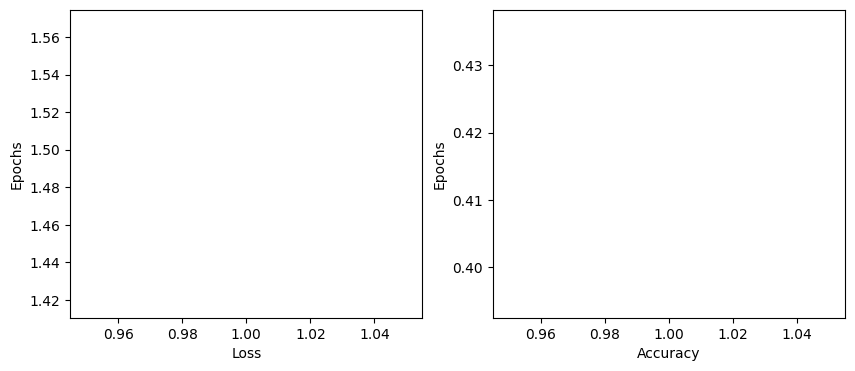

In [62]:
# You can fine-tune your model looking at below plots
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,2, 1)
ax.plot(np.arange(1,len(history[0])+1),history[0])
plt.xlabel('Loss')
plt.ylabel('Epochs')

ax = fig.add_subplot(1,2, 2)
ax.plot(np.arange(1,len(history[1])+1),history[1])
plt.xlabel('Accuracy')
plt.ylabel('Epochs')
plt.show()

### Evaluate your model

In [40]:
# Visualize top K predictions
def visualize_prediction(image, model, k=3):
  model.eval()

  preds = model(image.unsqueeze(1).float())

  topk = torch.topk(preds, k, dim=1)
  topk = topk.indices.numpy()
  print('Top {} Predictions'.format(k))
  for i in range(3):
    print('{}) {}'.format(i+1, classes[topk[0][i]]))

  plt.imshow(image[0].numpy(), cmap='gray')
  plt.show()

Test dataset size: 3589
Top 3 Predictions
1) Sad
2) Angry
3) Neutral


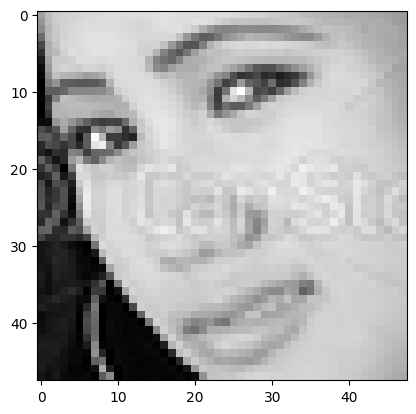


True label:  Disgust


In [52]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

test_dataset = FER2013Dataset(csv_file='fer2013.csv', usage='PublicTest', transform=transform)

# Test if it's working
print("Test dataset size:", len(test_dataset))  # ✅ check karo non-zero hai

image, label = test_dataset[1]
visualize_prediction(image, model)
print('\nTrue label: ', classes[int(label)])


In [84]:
# Reload the original emotion_data DataFrame to ensure it has string values in the 'pixels' column
emotion_data = pd.read_csv('./fer2013.csv')

emotion_data = emotion_data[emotion_data['pixels'].str.strip() != '']  # Filter out empty strings
emotion_data['pixels'] = emotion_data['pixels'].apply(
    lambda x: np.fromstring(x, dtype=int, sep=' ').reshape(48, 48).astype(float) / 255.
    if len(x.split()) == 2304 else np.zeros((48, 48), dtype=float)  # Handle invalid pixel strings
)

# Now create the full dataset
full_dataset = Fer2013Dataset(emotion_data['pixels'].values, emotion_data['emotion'].values, transforms=transform)  # Create a Dataset instance

# Split into train and test
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])

# Update the test_loader to use test_dataset
test_loader = DataLoader(test_dataset, batch_size=batch_size, num_workers=2)

In [83]:
# Print accuracy on test data
true_labels, predicted_labels = test_model(model, test_loader)

Accuracy of the network: 0 %


---

# BONUS TASK

### How can you improve the performance of your model given that the number of datapoints is fixed?

##### Hint: A very simple fix (discussed in Lab 2) is to use a pretrained CNN model. The pretrained model could be trained on any dataset (eg Imagenet) and the first few layers of the same can be directly used for this task.

### You are encouraged to try out different pretrained models like ResNet/VGG/AlexNet and see how the performance improves. Do all the models result in similar accuracy?

#  Transfer Learning:
Pretrained Model: You can use models like ResNet, VGG, or AlexNet that are pretrained on large datasets like ImageNet. These models have learned useful features (edges, textures, shapes, etc.) from millions of images and can be fine-tuned to perform well on your task, even with a small dataset.

How to Use: You can freeze the weights of the earlier layers (which capture basic features) and train only the final layers (which capture task-specific features) on your dataset. This way, you avoid overfitting and speed up training since the earlier layers are already pre-trained.

# Trying Different Models:
ResNet: Known for deep networks (many layers), and it uses residual connections to prevent vanishing gradients. It usually performs well on many tasks.

VGG: Simpler compared to ResNet, but has fewer parameters and is often faster to train, though it might not capture as complex features as ResNet.

AlexNet: A deeper CNN that won the 2012 ImageNet competition. It is faster but less effective than ResNet and VGG for more complex tasks.

You can try all these models and see which one performs the best for your specific task. Generally, ResNet tends to perform better for complex tasks, while VGG might be a good balance of simplicity and accuracy.

# Performance Comparison:
After trying different pretrained models, compare the accuracy, speed of training, and convergence. It's possible that some models (like ResNet) might lead to better accuracy, but at the cost of slower training. Others (like AlexNet) might train faster but may not reach the same level of accuracy.

By using pretrained models, you reduce the need for extensive training data and can significantly improve the performance of your model even with a fixed number of data points.